#Spark Project on Stock Analysis

##JSWSteels Stock Analysis

---

###👨‍💻 Group 8-*Infoforge*

**Team Members:**
1.	Nikhil Sharma\
2.	Mitanshu Ijankar\
3.	Neha Sardar\
4.	Mrudula Khobragadhe\
5.	Om Salunkhe\
6.	Nilesh Nawale

---


## Use JSWSTEEL.csv for the project


In [ ]:
pip install pyspark

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "1.8.0_462"
OpenJDK Runtime Environment (build 1.8.0_462-8u462-ga~us1-0ubuntu2~22.04.2-b08)
OpenJDK 64-Bit Server VM (build 25.462-b08, mixed mode)


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("JSWSTEEL Analysis").getOrCreate()

In [ ]:
sc=spark.sparkContext

### Task 1: Data Loading and Cleaning

In [ ]:
from pyspark.sql import Row

In [ ]:
df = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/sample_data/JSWSTEEL - JSWSTEEL.csv")

In [ ]:
df.printSchema()

root
 |-- Price: string (nullable = true)
 |-- Adj Close: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- Volume: string (nullable = true)



In [ ]:
df.show(5)

+--------------------+-----------+-----------+-----------+-----------+-----------+-----------+
|               Price|  Adj Close|      Close|       High|        Low|       Open|     Volume|
+--------------------+-----------+-----------+-----------+-----------+-----------+-----------+
|              Ticker|JSWSTEEL.NS|JSWSTEEL.NS|JSWSTEEL.NS|JSWSTEEL.NS|JSWSTEEL.NS|JSWSTEEL.NS|
|                Date|       NULL|       NULL|       NULL|       NULL|       NULL|       NULL|
|2003-05-08 00:00:...|7.759710789|10.39999962|11.19999981|10.17142773|10.97142792|     187943|
|2003-05-09 00:00:...|8.015524864|10.74285698|10.74285698|10.39999962|10.62857056|     114799|
|2003-05-12 00:00:...| 8.52715683|11.42857075|11.77142811|10.74285698|10.74285698|     752170|
+--------------------+-----------+-----------+-----------+-----------+-----------+-----------+
only showing top 5 rows



In [ ]:
df.describe().show()

+-------+--------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+
|summary|               Price|         Adj Close|             Close|             High|               Low|             Open|           Volume|
+-------+--------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+
|  count|                5337|              5336|              5336|             5336|              5336|             5336|             5336|
|   mean|                NULL| 210.8526054997737|225.06894397552958|228.5857724770272|221.63099292229265|225.2268351787535|8004678.651733833|
| stddev|                NULL|253.32931318532545|254.56008668395572| 257.617335183536|251.54070777847704|254.7443317546072| 8712962.35331059|
|    min|2003-05-08 00:00:...|       10.23258591|       10.39999962|      10.74285698|       10.17142773|      10.62857056|                0|
|    m

In [ ]:
df = df.withColumnRenamed("Price", "Date")

In [ ]:
df = df.withColumnRenamed("Adj Close", "Adj_Close")

In [ ]:
df.createOrReplaceTempView("jswsteel_stock")

In [ ]:
query = """
SELECT
  SUM(CASE WHEN Date IS NULL THEN 1 ELSE 0 END) AS Date_NullCount,
  SUM(CASE WHEN Open IS NULL THEN 1 ELSE 0 END) AS Open_NullCount,
  SUM(CASE WHEN High IS NULL THEN 1 ELSE 0 END) AS High_NullCount,
  SUM(CASE WHEN Low IS NULL THEN 1 ELSE 0 END) AS Low_NullCount,
  SUM(CASE WHEN Close IS NULL THEN 1 ELSE 0 END) AS Close_NullCount,
  SUM(CASE WHEN Volume IS NULL THEN 1 ELSE 0 END) AS Volume_NullCount
FROM jswsteel_stock
"""

spark.sql(query).show()


+--------------+--------------+--------------+-------------+---------------+----------------+
|Date_NullCount|Open_NullCount|High_NullCount|Low_NullCount|Close_NullCount|Volume_NullCount|
+--------------+--------------+--------------+-------------+---------------+----------------+
|             0|             1|             1|            1|              1|               1|
+--------------+--------------+--------------+-------------+---------------+----------------+



In [ ]:
df.show(5)

+--------------------+-----------+-----------+-----------+-----------+-----------+-----------+
|                Date|  Adj_Close|      Close|       High|        Low|       Open|     Volume|
+--------------------+-----------+-----------+-----------+-----------+-----------+-----------+
|              Ticker|JSWSTEEL.NS|JSWSTEEL.NS|JSWSTEEL.NS|JSWSTEEL.NS|JSWSTEEL.NS|JSWSTEEL.NS|
|                Date|       NULL|       NULL|       NULL|       NULL|       NULL|       NULL|
|2003-05-08 00:00:...|7.759710789|10.39999962|11.19999981|10.17142773|10.97142792|     187943|
|2003-05-09 00:00:...|8.015524864|10.74285698|10.74285698|10.39999962|10.62857056|     114799|
|2003-05-12 00:00:...| 8.52715683|11.42857075|11.77142811|10.74285698|10.74285698|     752170|
+--------------------+-----------+-----------+-----------+-----------+-----------+-----------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

# Add a new index column
df_with_index = df.withColumn("row_id", monotonically_increasing_id())

# Filter out first 2 rows based on row_id
filtered_df = df_with_index.filter(df_with_index.row_id >= 2).drop("row_id")

filtered_df.show(truncate=False)

+-------------------------+-----------+-----------+-----------+-----------+-----------+-------+
|Date                     |Adj_Close  |Close      |High       |Low        |Open       |Volume |
+-------------------------+-----------+-----------+-----------+-----------+-----------+-------+
|2003-05-08 00:00:00+00:00|7.759710789|10.39999962|11.19999981|10.17142773|10.97142792|187943 |
|2003-05-09 00:00:00+00:00|8.015524864|10.74285698|10.74285698|10.39999962|10.62857056|114799 |
|2003-05-12 00:00:00+00:00|8.52715683 |11.42857075|11.77142811|10.74285698|10.74285698|752170 |
|2003-05-13 00:00:00+00:00|8.52715683 |11.42857075|11.88571358|11.31428528|11.77142811|526229 |
|2003-05-14 00:00:00+00:00|9.294599533|12.45714188|13.1428566 |11.42857075|11.65714169|797615 |
|2003-05-15 00:00:00+00:00|9.294599533|12.45714188|12.80000019|12.34285736|12.5714283 |868012 |
|2003-05-16 00:00:00+00:00|9.209328651|12.34285736|12.80000019|12.11428547|12.5714283 |446810 |
|2003-05-19 00:00:00+00:00|9.038784981|1

In [ ]:
filtered_df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Adj_Close: string (nullable = true)
 |-- Close: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- Volume: string (nullable = true)



In [ ]:
filtered_df.show(10,truncate=False)

+-------------------------+-----------+-----------+-----------+-----------+-----------+------+
|Date                     |Adj_Close  |Close      |High       |Low        |Open       |Volume|
+-------------------------+-----------+-----------+-----------+-----------+-----------+------+
|2003-05-08 00:00:00+00:00|7.759710789|10.39999962|11.19999981|10.17142773|10.97142792|187943|
|2003-05-09 00:00:00+00:00|8.015524864|10.74285698|10.74285698|10.39999962|10.62857056|114799|
|2003-05-12 00:00:00+00:00|8.52715683 |11.42857075|11.77142811|10.74285698|10.74285698|752170|
|2003-05-13 00:00:00+00:00|8.52715683 |11.42857075|11.88571358|11.31428528|11.77142811|526229|
|2003-05-14 00:00:00+00:00|9.294599533|12.45714188|13.1428566 |11.42857075|11.65714169|797615|
|2003-05-15 00:00:00+00:00|9.294599533|12.45714188|12.80000019|12.34285736|12.5714283 |868012|
|2003-05-16 00:00:00+00:00|9.209328651|12.34285736|12.80000019|12.11428547|12.5714283 |446810|
|2003-05-19 00:00:00+00:00|9.038784981|12.11428547

In [ ]:
from pyspark.sql.functions import col, to_utc_timestamp

In [ ]:
filtered_df = filtered_df.withColumnRenamed("Adj Close", "Adj_Close")

type_cov_df = filtered_df \
    .withColumn("Date", to_utc_timestamp(col("Date"), "UTC")) \
    .withColumn("Open", col("Open").cast("double")) \
    .withColumn("High", col("High").cast("double")) \
    .withColumn("Low", col("Low").cast("double")) \
    .withColumn("Close", col("Close").cast("double")) \
    .withColumn("Adj_Close", col("Adj_Close").cast("double")) \
    .withColumn("Volume", col("Volume").cast("long"))


In [ ]:
type_cov_df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Adj_Close: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: long (nullable = true)



In [ ]:
type_cov_df.show(5, truncate=False)

+-------------------+-----------+-----------+-----------+-----------+-----------+------+
|Date               |Adj_Close  |Close      |High       |Low        |Open       |Volume|
+-------------------+-----------+-----------+-----------+-----------+-----------+------+
|2003-05-08 00:00:00|7.759710789|10.39999962|11.19999981|10.17142773|10.97142792|187943|
|2003-05-09 00:00:00|8.015524864|10.74285698|10.74285698|10.39999962|10.62857056|114799|
|2003-05-12 00:00:00|8.52715683 |11.42857075|11.77142811|10.74285698|10.74285698|752170|
|2003-05-13 00:00:00|8.52715683 |11.42857075|11.88571358|11.31428528|11.77142811|526229|
|2003-05-14 00:00:00|9.294599533|12.45714188|13.1428566 |11.42857075|11.65714169|797615|
+-------------------+-----------+-----------+-----------+-----------+-----------+------+
only showing top 5 rows



In [ ]:
type_cov_df.createOrReplaceTempView("jswsteel_stock_")

In [ ]:
query = """
SELECT
  SUM(CASE WHEN Date IS NULL THEN 1 ELSE 0 END) AS Date_NullCount,
  SUM(CASE WHEN Open IS NULL THEN 1 ELSE 0 END) AS Open_NullCount,
  SUM(CASE WHEN High IS NULL THEN 1 ELSE 0 END) AS High_NullCount,
  SUM(CASE WHEN Low IS NULL THEN 1 ELSE 0 END) AS Low_NullCount,
  SUM(CASE WHEN Close IS NULL THEN 1 ELSE 0 END) AS Close_NullCount,
  SUM(CASE WHEN Volume IS NULL THEN 1 ELSE 0 END) AS Volume_NullCount
FROM jswsteel_stock_
"""

spark.sql(query).show()


+--------------+--------------+--------------+-------------+---------------+----------------+
|Date_NullCount|Open_NullCount|High_NullCount|Low_NullCount|Close_NullCount|Volume_NullCount|
+--------------+--------------+--------------+-------------+---------------+----------------+
|             0|             0|             0|            0|              0|               0|
+--------------+--------------+--------------+-------------+---------------+----------------+



In [ ]:
spark.sql("""
SELECT
MIN(Close) AS Min_Close,
MAX(Close) AS Max_Close,
AVG(Close) AS Avg_Close,
STDDEV(Close) AS StdDev_Close
FROM jswsteel_stock_
""").show()

+-----------+-----------+------------------+------------------+
|  Min_Close|  Max_Close|         Avg_Close|      StdDev_Close|
+-----------+-----------+------------------+------------------+
|10.39999962|1039.099976|225.06894397552958|254.56008668395572|
+-----------+-----------+------------------+------------------+



In [ ]:
duplicate_count = type_cov_df.count() - type_cov_df.dropDuplicates().count()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
date_check_df = spark.sql("""
SELECT Date
FROM jswsteel_stock_
ORDER BY Date
""")
date_check_df.show(10)

+-------------------+
|               Date|
+-------------------+
|2003-05-08 00:00:00|
|2003-05-09 00:00:00|
|2003-05-12 00:00:00|
|2003-05-13 00:00:00|
|2003-05-14 00:00:00|
|2003-05-15 00:00:00|
|2003-05-16 00:00:00|
|2003-05-19 00:00:00|
|2003-05-20 00:00:00|
|2003-05-21 00:00:00|
+-------------------+
only showing top 10 rows



In [ ]:
clean_df=spark.sql(""" select Date, round(Adj_Close,2) as Adj_Close, round(Close,2) as Close,
round(High,2) as High, round(Low,2) as Low, round(Open,2) as Open, Volume
from  jswsteel_stock_
""")

In [ ]:
clean_df.show()

+-------------------+---------+-----+-----+-----+-----+-------+
|               Date|Adj_Close|Close| High|  Low| Open| Volume|
+-------------------+---------+-----+-----+-----+-----+-------+
|2003-05-08 00:00:00|     7.76| 10.4| 11.2|10.17|10.97| 187943|
|2003-05-09 00:00:00|     8.02|10.74|10.74| 10.4|10.63| 114799|
|2003-05-12 00:00:00|     8.53|11.43|11.77|10.74|10.74| 752170|
|2003-05-13 00:00:00|     8.53|11.43|11.89|11.31|11.77| 526229|
|2003-05-14 00:00:00|     9.29|12.46|13.14|11.43|11.66| 797615|
|2003-05-15 00:00:00|     9.29|12.46| 12.8|12.34|12.57| 868012|
|2003-05-16 00:00:00|     9.21|12.34| 12.8|12.11|12.57| 446810|
|2003-05-19 00:00:00|     9.04|12.11|12.69| 12.0|12.57| 445551|
|2003-05-20 00:00:00|     8.78|11.77|12.23|11.66| 12.0| 262185|
|2003-05-21 00:00:00|     9.55| 12.8|13.03|11.89| 12.0| 598363|
|2003-05-22 00:00:00|    10.23|13.71|13.83|12.46|13.14|1612429|
|2003-05-23 00:00:00|    10.66|14.29| 14.4|13.71|14.17| 904729|
|2003-05-26 00:00:00|    11.26|15.09|15.

In [ ]:
df_cleaned = clean_df.dropna(subset=["Date", "Close", "Volume"])

In [ ]:
df_cleaned.show()

+-------------------+---------+-----+-----+-----+-----+-------+
|               Date|Adj_Close|Close| High|  Low| Open| Volume|
+-------------------+---------+-----+-----+-----+-----+-------+
|2003-05-08 00:00:00|     7.76| 10.4| 11.2|10.17|10.97| 187943|
|2003-05-09 00:00:00|     8.02|10.74|10.74| 10.4|10.63| 114799|
|2003-05-12 00:00:00|     8.53|11.43|11.77|10.74|10.74| 752170|
|2003-05-13 00:00:00|     8.53|11.43|11.89|11.31|11.77| 526229|
|2003-05-14 00:00:00|     9.29|12.46|13.14|11.43|11.66| 797615|
|2003-05-15 00:00:00|     9.29|12.46| 12.8|12.34|12.57| 868012|
|2003-05-16 00:00:00|     9.21|12.34| 12.8|12.11|12.57| 446810|
|2003-05-19 00:00:00|     9.04|12.11|12.69| 12.0|12.57| 445551|
|2003-05-20 00:00:00|     8.78|11.77|12.23|11.66| 12.0| 262185|
|2003-05-21 00:00:00|     9.55| 12.8|13.03|11.89| 12.0| 598363|
|2003-05-22 00:00:00|    10.23|13.71|13.83|12.46|13.14|1612429|
|2003-05-23 00:00:00|    10.66|14.29| 14.4|13.71|14.17| 904729|
|2003-05-26 00:00:00|    11.26|15.09|15.

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import last

# Define a window for forward fill (based on Date ordering)
window_spec = Window.orderBy("Date").rowsBetween(Window.unboundedPreceding, 0)

# Forward fill missing values in Close column
df_cleaned = df_cleaned.withColumn("Close_filled", last("Close",
ignorenulls=True).over(window_spec))

In [ ]:
df_cleaned.show()

+-------------------+---------+-----+-----+-----+-----+-------+------------+
|               Date|Adj_Close|Close| High|  Low| Open| Volume|Close_filled|
+-------------------+---------+-----+-----+-----+-----+-------+------------+
|2003-05-08 00:00:00|     7.76| 10.4| 11.2|10.17|10.97| 187943|        10.4|
|2003-05-09 00:00:00|     8.02|10.74|10.74| 10.4|10.63| 114799|       10.74|
|2003-05-12 00:00:00|     8.53|11.43|11.77|10.74|10.74| 752170|       11.43|
|2003-05-13 00:00:00|     8.53|11.43|11.89|11.31|11.77| 526229|       11.43|
|2003-05-14 00:00:00|     9.29|12.46|13.14|11.43|11.66| 797615|       12.46|
|2003-05-15 00:00:00|     9.29|12.46| 12.8|12.34|12.57| 868012|       12.46|
|2003-05-16 00:00:00|     9.21|12.34| 12.8|12.11|12.57| 446810|       12.34|
|2003-05-19 00:00:00|     9.04|12.11|12.69| 12.0|12.57| 445551|       12.11|
|2003-05-20 00:00:00|     8.78|11.77|12.23|11.66| 12.0| 262185|       11.77|
|2003-05-21 00:00:00|     9.55| 12.8|13.03|11.89| 12.0| 598363|        12.8|

In [ ]:
from pyspark.sql.functions import to_date
df_cleaned = df_cleaned.withColumn("Date", to_date("Date", "yyyy-MM-dd"))

In [ ]:
df_cleaned.show()

+----------+---------+-----+-----+-----+-----+-------+------------+
|      Date|Adj_Close|Close| High|  Low| Open| Volume|Close_filled|
+----------+---------+-----+-----+-----+-----+-------+------------+
|2003-05-08|     7.76| 10.4| 11.2|10.17|10.97| 187943|        10.4|
|2003-05-09|     8.02|10.74|10.74| 10.4|10.63| 114799|       10.74|
|2003-05-12|     8.53|11.43|11.77|10.74|10.74| 752170|       11.43|
|2003-05-13|     8.53|11.43|11.89|11.31|11.77| 526229|       11.43|
|2003-05-14|     9.29|12.46|13.14|11.43|11.66| 797615|       12.46|
|2003-05-15|     9.29|12.46| 12.8|12.34|12.57| 868012|       12.46|
|2003-05-16|     9.21|12.34| 12.8|12.11|12.57| 446810|       12.34|
|2003-05-19|     9.04|12.11|12.69| 12.0|12.57| 445551|       12.11|
|2003-05-20|     8.78|11.77|12.23|11.66| 12.0| 262185|       11.77|
|2003-05-21|     9.55| 12.8|13.03|11.89| 12.0| 598363|        12.8|
|2003-05-22|    10.23|13.71|13.83|12.46|13.14|1612429|       13.71|
|2003-05-23|    10.66|14.29| 14.4|13.71|14.17| 9

In [ ]:
from pyspark.sql.functions import lag, col

# Create a window to calculate the previous day's Close price
window_spec = Window.orderBy("Date")

# Calculate daily returns as a percentage change from the previous day
df_cleaned = df_cleaned.withColumn("Prev_Close", lag("Close").over(window_spec))
df_cleaned = df_cleaned.withColumn("Daily_Return", ((col("Close") - col("Prev_Close")) / col("Prev_Close")) * 100)


In [ ]:
df_cleaned.show()

+----------+---------+-----+-----+-----+-----+-------+------------+----------+-------------------+
|      Date|Adj_Close|Close| High|  Low| Open| Volume|Close_filled|Prev_Close|       Daily_Return|
+----------+---------+-----+-----+-----+-----+-------+------------+----------+-------------------+
|2003-05-08|     7.76| 10.4| 11.2|10.17|10.97| 187943|        10.4|      NULL|               NULL|
|2003-05-09|     8.02|10.74|10.74| 10.4|10.63| 114799|       10.74|      10.4|  3.269230769230768|
|2003-05-12|     8.53|11.43|11.77|10.74|10.74| 752170|       11.43|     10.74|  6.424581005586587|
|2003-05-13|     8.53|11.43|11.89|11.31|11.77| 526229|       11.43|     11.43|                0.0|
|2003-05-14|     9.29|12.46|13.14|11.43|11.66| 797615|       12.46|     11.43|  9.011373578302722|
|2003-05-15|     9.29|12.46| 12.8|12.34|12.57| 868012|       12.46|     12.46|                0.0|
|2003-05-16|     9.21|12.34| 12.8|12.11|12.57| 446810|       12.34|     12.46|-0.9630818619582744|
|2003-05-1

In [ ]:
from pyspark.sql.functions import avg

# Define windows for 50-day and 200-day moving averages
window_50 = Window.orderBy("Date").rowsBetween(-49, 0)  # 50-day window
window_200 = Window.orderBy("Date").rowsBetween(-199, 0)  # 200-day window

# Calculate 50-day and 200-day moving averages for 'Close' prices
df_cleaned = df_cleaned.withColumn("SMA_50", avg("Close").over(window_50))
df_cleaned = df_cleaned.withColumn("SMA_200", avg("Close").over(window_200))


In [ ]:
df_cleaned.show()

+----------+---------+-----+-----+-----+-----+-------+------------+----------+-------------------+------------------+------------------+
|      Date|Adj_Close|Close| High|  Low| Open| Volume|Close_filled|Prev_Close|       Daily_Return|            SMA_50|           SMA_200|
+----------+---------+-----+-----+-----+-----+-------+------------+----------+-------------------+------------------+------------------+
|2003-05-08|     7.76| 10.4| 11.2|10.17|10.97| 187943|        10.4|      NULL|               NULL|              10.4|              10.4|
|2003-05-09|     8.02|10.74|10.74| 10.4|10.63| 114799|       10.74|      10.4|  3.269230769230768|             10.57|             10.57|
|2003-05-12|     8.53|11.43|11.77|10.74|10.74| 752170|       11.43|     10.74|  6.424581005586587|10.856666666666667|10.856666666666667|
|2003-05-13|     8.53|11.43|11.89|11.31|11.77| 526229|       11.43|     11.43|                0.0|              11.0|              11.0|
|2003-05-14|     9.29|12.46|13.14|11.43|1

In [ ]:
# Drop unnecessary columns
df_cleaned = df_cleaned.drop("Ticker", "Prev_Close")

In [ ]:
df_cleaned.show()

+----------+---------+-----+-----+-----+-----+-------+------------+-------------------+------------------+------------------+
|      Date|Adj_Close|Close| High|  Low| Open| Volume|Close_filled|       Daily_Return|            SMA_50|           SMA_200|
+----------+---------+-----+-----+-----+-----+-------+------------+-------------------+------------------+------------------+
|2003-05-08|     7.76| 10.4| 11.2|10.17|10.97| 187943|        10.4|               NULL|              10.4|              10.4|
|2003-05-09|     8.02|10.74|10.74| 10.4|10.63| 114799|       10.74|  3.269230769230768|             10.57|             10.57|
|2003-05-12|     8.53|11.43|11.77|10.74|10.74| 752170|       11.43|  6.424581005586587|10.856666666666667|10.856666666666667|
|2003-05-13|     8.53|11.43|11.89|11.31|11.77| 526229|       11.43|                0.0|              11.0|              11.0|
|2003-05-14|     9.29|12.46|13.14|11.43|11.66| 797615|       12.46|  9.011373578302722|            11.292|            

In [ ]:
# Verify schema and show final data preview
df_cleaned.printSchema()
df_cleaned.show(5)

root
 |-- Date: date (nullable = true)
 |-- Adj_Close: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Close_filled: double (nullable = true)
 |-- Daily_Return: double (nullable = true)
 |-- SMA_50: double (nullable = true)
 |-- SMA_200: double (nullable = true)

+----------+---------+-----+-----+-----+-----+------+------------+-----------------+------------------+------------------+
|      Date|Adj_Close|Close| High|  Low| Open|Volume|Close_filled|     Daily_Return|            SMA_50|           SMA_200|
+----------+---------+-----+-----+-----+-----+------+------------+-----------------+------------------+------------------+
|2003-05-08|     7.76| 10.4| 11.2|10.17|10.97|187943|        10.4|             NULL|              10.4|              10.4|
|2003-05-09|     8.02|10.74|10.74| 10.4|10.63|114799|       10.74|3.26923076923076

**Phase 3:EXPLORATORY DATA ANALYSIS**


In [ ]:
# Summary statistics for numerical columns
df_cleaned.describe(["Open", "High", "Low", "Close", "Volume", "Daily_Return"]).show()

+-------+------------------+------------------+------------------+------------------+-----------------+------------------+
|summary|              Open|              High|               Low|             Close|           Volume|      Daily_Return|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+
|  count|              5335|              5335|              5335|              5335|             5335|              5334|
|   mean| 225.2269053420807|228.58584629803164|221.63106654170542|225.06912464854724|8004678.651733833|0.1275285363891887|
| stddev|254.74428912162853|  257.617281289734| 251.5406716479598|254.55996373577685| 8712962.35331059| 2.951831387262559|
|    min|             10.63|             10.74|             10.17|              10.4|                0|-17.83783783783783|
|    max|            1042.0|            1063.0|            1027.3|            1039.1|        123359590| 33.71080139372821|
+-------+-------

In [ ]:
# Register DataFrame as a temporary SQL view
df_cleaned.createOrReplaceTempView("jsw_stock_cleaned")

In [ ]:
# SQL query to calculate summary statistics for the &#39;Close&#39; and &#39;Volume&#39; columns
spark.sql('''
SELECT
MIN(Close) AS Min_Close,
MAX(Close) AS Max_Close,
AVG(Close) AS Avg_Close,
STDDEV(Close) AS StdDev_Close,
MIN(Volume) AS Min_Volume,
MAX(Volume) AS Max_Volume,
AVG(Volume) AS Avg_Volume,
STDDEV(Volume) AS StdDev_Volume
FROM jsw_stock_cleaned
''').show()

+---------+---------+------------------+------------------+----------+----------+-----------------+----------------+
|Min_Close|Max_Close|         Avg_Close|      StdDev_Close|Min_Volume|Max_Volume|       Avg_Volume|   StdDev_Volume|
+---------+---------+------------------+------------------+----------+----------+-----------------+----------------+
|     10.4|   1039.1|225.06912464854724|254.55996373577685|         0| 123359590|8004678.651733833|8712962.35331059|
+---------+---------+------------------+------------------+----------+----------+-----------------+----------------+



In [ ]:
# Summary of daily returns
spark.sql('''
SELECT
AVG(Daily_Return) AS Avg_Daily_Return,

STDDEV(Daily_Return) AS Daily_Return_StdDev,
MIN(Daily_Return) AS Min_Daily_Return,
MAX(Daily_Return) AS Max_Daily_Return
FROM jsw_stock_cleaned
''').show()

+------------------+-------------------+------------------+-----------------+
|  Avg_Daily_Return|Daily_Return_StdDev|  Min_Daily_Return| Max_Daily_Return|
+------------------+-------------------+------------------+-----------------+
|0.1275285363891887|  2.951831387262559|-17.83783783783783|33.71080139372821|
+------------------+-------------------+------------------+-----------------+



In [ ]:
spark.sql('''
SELECT
Date,
Close,
SMA_50,
SMA_200,
CASE WHEN SMA_50>SMA_200 THEN 'Uptrend' ELSE 'Downtrend' END AS Trend
FROM jsw_stock_cleaned
ORDER BY Date
''').show(10)

+----------+-----+------------------+------------------+---------+
|      Date|Close|            SMA_50|           SMA_200|    Trend|
+----------+-----+------------------+------------------+---------+
|2003-05-08| 10.4|              10.4|              10.4|Downtrend|
|2003-05-09|10.74|             10.57|             10.57|Downtrend|
|2003-05-12|11.43|10.856666666666667|10.856666666666667|Downtrend|
|2003-05-13|11.43|              11.0|              11.0|Downtrend|
|2003-05-14|12.46|            11.292|            11.292|Downtrend|
|2003-05-15|12.46|11.486666666666666|11.486666666666666|Downtrend|
|2003-05-16|12.34|11.608571428571429|11.608571428571429|Downtrend|
|2003-05-19|12.11|          11.67125|          11.67125|Downtrend|
|2003-05-20|11.77|11.682222222222222|11.682222222222222|Downtrend|
|2003-05-21| 12.8|            11.794|            11.794|Downtrend|
+----------+-----+------------------+------------------+---------+
only showing top 10 rows



In [ ]:
# SQL query to find days with the highest volume and corresponding price changes
spark.sql('''
SELECT
Date,
Volume,
Close,
Daily_Return
FROM jsw_stock_cleaned
ORDER BY Volume DESC
LIMIT 10
''').show()

+----------+---------+-----+-------------------+
|      Date|   Volume|Close|       Daily_Return|
+----------+---------+-----+-------------------+
|2009-11-19|123359590|95.88|-0.6836544437538955|
|2009-05-07|101361090|42.94| 11.852044803334195|
|2011-08-01| 93756040| 69.5|-10.078923534739301|
|2009-05-11| 91357510|42.44| 3.6638983878847093|
|2009-05-28| 87486240|54.94|  6.328623959744524|
|2009-06-12| 86900060|70.73| 11.053540587219354|
|2009-05-08| 85273080|40.94| -4.657661853749418|
|2009-05-12| 77044550|41.77| -1.578699340245039|
|2009-04-02| 76851160|30.51|  21.55378486055777|
|2009-04-09| 75097120|34.76| 13.743455497382199|
+----------+---------+-----+-------------------+



In [ ]:
from pyspark.sql.functions import month

# Extract month from the Date column and calculate average Close price and Volume by month
df_monthly = df_cleaned.withColumn('Month', month('Date'))
df_monthly.groupBy('Month').avg('Close', 'Volume').orderBy('Month').show()

+-----+------------------+-----------------+
|Month|        avg(Close)|      avg(Volume)|
+-----+------------------+-----------------+
|    1|218.44972789115627|7820104.267573697|
|    2| 217.8695883777239|7993313.924939468|
|    3|207.28770301624124|8406701.136890952|
|    4|229.71947630922696| 9645228.36159601|
|    5| 223.3213636363636|9680976.225108225|
|    6|219.61292735042724|7870724.974358974|
|    7|223.49981327800828|7847705.533195021|
|    8| 235.1146868250539|8200833.557235422|
|    9|242.10610132158598|7448626.894273127|
|   10|241.96534988713316|7439144.009029346|
|   11|226.10079069767437|6930028.995348837|
|   12|214.98950782997755|6870718.185682327|
+-----+------------------+-----------------+



In [ ]:
# Calculate average close price and volume by month using SQL
spark.sql('''
SELECT
MONTH(Date) AS Month,
AVG(Close) AS Avg_Monthly_Close,
AVG(Volume) AS Avg_Monthly_Volume
FROM jsw_stock_cleaned
GROUP BY MONTH(Date)
ORDER BY Month
''').show()

+-----+------------------+------------------+
|Month| Avg_Monthly_Close|Avg_Monthly_Volume|
+-----+------------------+------------------+
|    1|218.44972789115627| 7820104.267573697|
|    2| 217.8695883777239| 7993313.924939468|
|    3|207.28770301624124| 8406701.136890952|
|    4|229.71947630922696|  9645228.36159601|
|    5| 223.3213636363636| 9680976.225108225|
|    6|219.61292735042724| 7870724.974358974|
|    7|223.49981327800828| 7847705.533195021|
|    8| 235.1146868250539| 8200833.557235422|
|    9|242.10610132158598| 7448626.894273127|
|   10|241.96534988713316| 7439144.009029346|
|   11|226.10079069767437| 6930028.995348837|
|   12|214.98950782997755| 6870718.185682327|
+-----+------------------+------------------+



In [ ]:
# Query to find the most volatile days based on absolute daily returns
spark.sql('''
SELECT
Date,
Close,
Daily_Return
FROM jsw_stock_cleaned
ORDER BY ABS(Daily_Return) DESC
LIMIT 10
''').show()

+----------+-----+-------------------+
|      Date|Close|       Daily_Return|
+----------+-----+-------------------+
|2008-10-31| 30.7|  33.71080139372821|
|2009-04-02|30.51|  21.55378486055777|
|2003-08-14|46.74|  19.93841416474212|
|2008-12-04|21.92|  19.38997821350764|
|2020-03-23|144.4| -17.83783783783783|
|2004-07-15|25.03|  17.73283160865475|
|2009-05-18|48.78|  16.53129479216436|
|2008-10-06|34.76|-15.425790754257914|
|2003-08-12|33.94| 15.089860969820275|
|2003-08-13|38.97|   14.8202710665881|
+----------+-----+-------------------+



**Phase 4: Correlation and Trend Analysis**

In [ ]:
close_volume_corr = df_cleaned.stat.corr("Close", "Volume")


In [ ]:
print(f"Correlation between Close and Volume: {close_volume_corr}")


Correlation between Close and Volume: -0.21429063162816578


In [ ]:
# Correlation between Close Price and Volume
spark.sql("""
SELECT corr(Close, Volume) AS Close_Volume_Correlation
FROM jsw_stock_cleaned
""").show()


+------------------------+
|Close_Volume_Correlation|
+------------------------+
|    -0.21429063162816578|
+------------------------+



In [ ]:
# Correlation Among Other Variables

spark.sql("""
SELECT
  corr(Open, Close) AS Open_Close_Correlation,
  corr(High, Close) AS High_Close_Correlation,
  corr(Low, Close) AS Low_Close_Correlation,
  corr(Volume, Close) AS Volume_Close_Correlation
FROM jsw_stock_cleaned
""").show()


+----------------------+----------------------+---------------------+------------------------+
|Open_Close_Correlation|High_Close_Correlation|Low_Close_Correlation|Volume_Close_Correlation|
+----------------------+----------------------+---------------------+------------------------+
|    0.9997209426857374|    0.9998939008049866|   0.9998820589897723|    -0.21429063162816578|
+----------------------+----------------------+---------------------+------------------------+



In [ ]:
# Crossovers in Moving Averages
spark.sql("""
SELECT
  Date,
  Close,
  SMA_50,
  SMA_200,
  CASE
    WHEN SMA_50 > SMA_200 THEN 'Uptrend'
    ELSE 'Downtrend'
  END AS Trend
FROM jsw_stock_cleaned
ORDER BY Date
""").show(10)


+----------+-----+------------------+------------------+---------+
|      Date|Close|            SMA_50|           SMA_200|    Trend|
+----------+-----+------------------+------------------+---------+
|2003-05-08| 10.4|              10.4|              10.4|Downtrend|
|2003-05-09|10.74|             10.57|             10.57|Downtrend|
|2003-05-12|11.43|10.856666666666667|10.856666666666667|Downtrend|
|2003-05-13|11.43|              11.0|              11.0|Downtrend|
|2003-05-14|12.46|            11.292|            11.292|Downtrend|
|2003-05-15|12.46|11.486666666666666|11.486666666666666|Downtrend|
|2003-05-16|12.34|11.608571428571429|11.608571428571429|Downtrend|
|2003-05-19|12.11|          11.67125|          11.67125|Downtrend|
|2003-05-20|11.77|11.682222222222222|11.682222222222222|Downtrend|
|2003-05-21| 12.8|            11.794|            11.794|Downtrend|
+----------+-----+------------------+------------------+---------+
only showing top 10 rows



In [ ]:
# Price Volatility Analysis
# Calculate Rolling Standard Deviation (Volatility)


spark.sql("""
SELECT
  Date,
  Close,
  Daily_Return,
  stddev(Daily_Return) OVER (
    ORDER BY Date
    ROWS BETWEEN 29 PRECEDING AND CURRENT ROW
  ) AS Volatility_30
FROM jsw_stock_cleaned
ORDER BY Date
""").show(10)


+----------+-----+-------------------+------------------+
|      Date|Close|       Daily_Return|     Volatility_30|
+----------+-----+-------------------+------------------+
|2003-05-08| 10.4|               NULL|              NULL|
|2003-05-09|10.74|  3.269230769230768|              NULL|
|2003-05-12|11.43|  6.424581005586587| 2.231169549145775|
|2003-05-13|11.43|                0.0| 3.212458716567418|
|2003-05-14|12.46|  9.011373578302722| 3.902861126315629|
|2003-05-15|12.46|                0.0|3.9746437849399157|
|2003-05-16|12.34|-0.9630818619582744| 4.040588702451132|
|2003-05-19|12.11|-1.8638573743922238| 4.114051096872846|
|2003-05-20|11.77|-2.8075970272502055| 4.210477124087108|
|2003-05-21| 12.8|   8.75106202209007|  4.59787271682774|
+----------+-----+-------------------+------------------+
only showing top 10 rows



In [ ]:
# 4.4 Detecting Seasonal Patterns
# a) Monthly Trends in Closing Prices
spark.sql("""
SELECT
  MONTH(Date) AS Month,
  AVG(Close) AS Avg_Close
FROM jsw_stock_cleaned
GROUP BY MONTH(Date)
ORDER BY Month
""").show()


+-----+------------------+
|Month|         Avg_Close|
+-----+------------------+
|    1|218.44972789115627|
|    2| 217.8695883777239|
|    3|207.28770301624124|
|    4|229.71947630922696|
|    5| 223.3213636363636|
|    6|219.61292735042724|
|    7|223.49981327800828|
|    8| 235.1146868250539|
|    9|242.10610132158598|
|   10|241.96534988713316|
|   11|226.10079069767437|
|   12|214.98950782997755|
+-----+------------------+



In [ ]:
# 4.5 Detect Anomalous Trends
spark.sql("""
SELECT
  Date,
  Close,
  Daily_Return
FROM jsw_stock_cleaned
WHERE ABS(Daily_Return) > (
  SELECT AVG(Daily_Return) + 3 * STDDEV(Daily_Return)
  FROM jsw_stock_cleaned
)
ORDER BY ABS(Daily_Return) DESC
""").show(10)


+----------+-----+-------------------+
|      Date|Close|       Daily_Return|
+----------+-----+-------------------+
|2008-10-31| 30.7|  33.71080139372821|
|2009-04-02|30.51|  21.55378486055777|
|2003-08-14|46.74|  19.93841416474212|
|2008-12-04|21.92|  19.38997821350764|
|2020-03-23|144.4| -17.83783783783783|
|2004-07-15|25.03|  17.73283160865475|
|2009-05-18|48.78|  16.53129479216436|
|2008-10-06|34.76|-15.425790754257914|
|2003-08-12|33.94| 15.089860969820275|
|2003-08-13|38.97|   14.8202710665881|
+----------+-----+-------------------+
only showing top 10 rows



#After completing Step 4: Correlation & Trend Analysis for JSW Steel (JSWSTEEL.csv), the following deliverables were produced:

#1. Correlation Analysis

A detailed correlation study was conducted between key numerical variables including Open, High, Low, Close, Volume, and Daily_Return.
This analysis provides clarity on how strongly each feature is related to the closing price of JSW Steel.

Outcome:

Identified strong price-based correlations (Open–Close, High–Close, Low–Close).

Measured the degree of association between trading volume and closing price.

Created a correlation matrix for use in predictive and trend models.

#2. Moving Average Crossovers (50-day & 200-day)

Short-term (SMA-50) and long-term (SMA-200) moving averages were calculated to analyze long-term price trends.

Outcome:

Detected bullish crossovers (SMA-50 rising above SMA-200) indicating potential upward momentum.

Detected bearish crossovers (SMA-50 falling below SMA-200) indicating possible downward trends.

These crossovers provide early signals used in trading strategies and trend prediction.

#3. Volatility Analysis (Rolling Standard Deviation)

30-day rolling volatility was computed using the standard deviation of Daily_Return.

Outcome:

Identified high-volatility periods where JSW Steel exhibited rapid price movement.

Recognized low-volatility phases indicating market stability.

This helps in understanding risk and potential market events impacting the stock

#4. Seasonal Trends (Monthly Behaviour Analysis)

Monthly averages of Close price and Volume were analyzed to determine seasonal patterns in JSW Steel.

Outcome:

Highlighted months with consistently higher or lower average closing prices.

Identified trading activity cycles driven by market, industry, or seasonal demand factors.

Useful for understanding periodic behavior and planning strategic entry/exit points.

#5. Outlier Detection (Anomalous Return Days)

Daily returns were examined using statistical thresholds (mean ± 3×standard deviation) to detect abnormal price movements.

Outcome:

Identified specific dates with extreme positive or negative daily returns.

These days often correspond to major announcements, market events, sector news, or macro-economic impacts.

Helpful for understanding risk spikes or unusual investor reactions.

##Key Findings — JSW Steel Stock Analysis

Based on our statistical, technical, and time-series analysis of JSW Steel stock data, the following insights and interpretations were observed:

#1. Price Trends (Moving Average Crossovers)

Insight:
The comparison of JSW Steel’s 50-day and 200-day moving averages highlighted clear trend patterns.

Bullish crossovers (SMA-50 crossing above SMA-200) typically aligned with upward momentum phases.

Bearish crossovers (SMA-50 falling below SMA-200) indicated weakening price trends or potential decline.

Recommendation:
Investors should monitor these crossovers as early trend signals.

Consider buy positions when a bullish crossover occurs.

Consider exit or caution during bearish crossovers.

#2. Volatility Analysis

Insight:
The 30-day rolling volatility showed that JSW Steel experiences periodic high-volatility phases, often aligning with:

global steel market shifts

commodity price fluctuations (iron ore, coal)

quarterly financial announcements

macro-economic events affecting manufacturing/infra sector

These periods reflected sudden and sharp price movements.

Recommendation:

Risk-averse investors should reduce exposure during high volatility phases.

Risk-taking traders may use these periods to execute momentum or swing trades.
Monitoring volatility can help adjust position size and timing.
#3. Trading Volume and Price Relationship

Insight:
A moderate relationship was observed between Volume and Price movements.
Large spikes in trading volume typically aligned with:

market news about steel demand

company announcements (expansion, capacity utilization, EBITDA performance)

sector sentiment changes

Higher volume often confirmed the strength of ongoing price trends.

Recommendation:
Use volume as a secondary confirmation indicator:

When an upward price move is supported by rising volume, the trend is stronger.

Weak volume behind price moves may indicate temporary or unreliable trends.

#4. Seasonal and Monthly Patterns

Insight:
Monthly trend analysis showed that JSW Steel exhibits mild seasonality, with certain months showing higher average closing prices. These patterns may be influenced by:

infrastructure and construction season cycles

steel demand rises during April–September (government project execution period)

dips during low construction months or global slowdown periods

Recommendation:
Investors can strategically plan entry/exit based on these recurring patterns.
Aligning trades with seasonal demand cycles may help maximize returns.

#5. Outliers and Event-Based Movements

Insight:
Outlier analysis (3σ rule) identified several days with extreme positive or negative returns. These anomalies corresponded to:

quarterly result announcements

global steel price shocks

export/import policy changes

credit rating or debt-related updates

commodity cost fluctuations

These events caused large deviation from normal price behavior.

Recommendation:

Investors should stay updated on JSW Steel corporate events, government policies, and global steel market news.

Event-based alerts can help take timely decisions during unexpected spikes or crashes.

#6. Forecasting Insights (From Phase 5 Model)

Insight:
The SARIMAX(1,1,2) model produced reasonably accurate short-term forecasts.
The model slightly outperformed the naïve baseline, suggesting predictable short-term behavior but also highlighting volatility spikes in test periods.

Recommendation:
Use forecast output only as a supplementary tool, not a standalone decision-maker.
Short-term predictions are useful for planning entry/exit levels, but should be combined with:

trend indicators

volume signals

market news

seasonal patterns

**PHASE 5 : STRATEGIC INSIGHTS AND RECOMMENDATIONS**

In [ ]:
from pyspark.sql.functions import col


In [ ]:
df = df_cleaned.withColumn("Date", to_date(col("Date")))
df = df.orderBy("Date")

In [ ]:
trend_df = spark.sql("""
    SELECT
        Date,
        Close,
        SMA_50,
        SMA_200,
        CASE WHEN SMA_50 > SMA_200 THEN 'Uptrend' ELSE 'Downtrend' END AS Trend
    FROM jsw_stock_cleaned
    ORDER BY Date
""")
trend_df.show(10)

+----------+-----+------------------+------------------+---------+
|      Date|Close|            SMA_50|           SMA_200|    Trend|
+----------+-----+------------------+------------------+---------+
|2003-05-08| 10.4|              10.4|              10.4|Downtrend|
|2003-05-09|10.74|             10.57|             10.57|Downtrend|
|2003-05-12|11.43|10.856666666666667|10.856666666666667|Downtrend|
|2003-05-13|11.43|              11.0|              11.0|Downtrend|
|2003-05-14|12.46|            11.292|            11.292|Downtrend|
|2003-05-15|12.46|11.486666666666666|11.486666666666666|Downtrend|
|2003-05-16|12.34|11.608571428571429|11.608571428571429|Downtrend|
|2003-05-19|12.11|          11.67125|          11.67125|Downtrend|
|2003-05-20|11.77|11.682222222222222|11.682222222222222|Downtrend|
|2003-05-21| 12.8|            11.794|            11.794|Downtrend|
+----------+-----+------------------+------------------+---------+
only showing top 10 rows



### Task 3: Volatility Analysis

In [ ]:
volatility_stats = spark.sql("""
    SELECT
        ROUND(AVG(Daily_Return),4) AS Avg_Daily_Return,
        ROUND(STDDEV(Daily_Return),4) AS StdDev_Daily_Return,
        MIN(Daily_Return) AS Min_Daily_Return,
        MAX(Daily_Return) AS Max_Daily_Return
    FROM jsw_stock_cleaned
""")
volatility_stats.show()

+----------------+-------------------+------------------+-----------------+
|Avg_Daily_Return|StdDev_Daily_Return|  Min_Daily_Return| Max_Daily_Return|
+----------------+-------------------+------------------+-----------------+
|          0.1275|             2.9518|-17.83783783783783|33.71080139372821|
+----------------+-------------------+------------------+-----------------+



Correlation Summary

In [ ]:
spark.sql("""
    SELECT
        corr(Open, Close) AS Open_Close_Corr,
        corr(High, Close) AS High_Close_Corr,
        corr(Low, Close) AS Low_Close_Corr,
        corr(Volume, Close) AS Volume_Close_Corr
    FROM jsw_stock_cleaned
""").show()

+------------------+------------------+------------------+--------------------+
|   Open_Close_Corr|   High_Close_Corr|    Low_Close_Corr|   Volume_Close_Corr|
+------------------+------------------+------------------+--------------------+
|0.9997209426857374|0.9998939008049866|0.9998820589897723|-0.21429063162816578|
+------------------+------------------+------------------+--------------------+



**Seasonal Behavior**

In [ ]:
spark.sql("""
    SELECT
        MONTH(Date) AS Month,
        ROUND(AVG(Close),2) AS Avg_Monthly_Close
    FROM jsw_stock_cleaned
    GROUP BY MONTH(Date)
    ORDER BY Month
""").show()

+-----+-----------------+
|Month|Avg_Monthly_Close|
+-----+-----------------+
|    1|           218.45|
|    2|           217.87|
|    3|           207.29|
|    4|           229.72|
|    5|           223.32|
|    6|           219.61|
|    7|            223.5|
|    8|           235.11|
|    9|           242.11|
|   10|           241.97|
|   11|            226.1|
|   12|           214.99|
+-----+-----------------+



**PHASE 6 : PRESENTATION AND DOCUMENTATION**

## JSW Steel Stock Analysis: Summary Report

### Key Findings

1.  **Price Trends (Moving Average Crossovers)**:
    *   Bullish crossovers (SMA-50 above SMA-200) indicated upward momentum, while bearish crossovers signaled potential declines. These serve as critical trend indicators.

2.  **Volatility Analysis**:
    *   JSW Steel experiences periodic high-volatility phases, often linked to global steel market shifts, commodity price fluctuations, quarterly financial announcements, and macroeconomic events. These periods are characterized by sharp price movements.

3.  **Trading Volume and Price Relationship**:
    *   A moderate relationship between volume and price movements was observed. Large volume spikes frequently coincided with market news, company announcements, or sector sentiment changes, confirming the strength of price trends.

4.  **Seasonal and Monthly Patterns**:
    *   Mild seasonality exists, with certain months showing higher average closing prices, potentially influenced by infrastructure and construction season cycles (e.g., higher demand from April to September).

5.  **Outliers and Event-Based Movements**:
    *   Extreme positive or negative daily returns (anomalies identified by the 3σ rule) correlated with significant events like quarterly results, global steel price shocks, policy changes, or credit rating updates.

6.  **Forecasting Insights (from SARIMAX Model)**:
    *   The SARIMAX(1,1,2) model provided reasonably accurate short-term forecasts, slightly outperforming the naïve baseline, suggesting predictable short-term behavior despite volatility.

### Overall Summary

-   JSW Steel demonstrates steady long-term growth but is subject to moderate short-term volatility.
-   SMA crossovers are reliable indicators for trend reversals, useful for strategic entry and exit points.
-   Volatility spikes are closely tied to macroeconomic conditions or company-specific news.
-   While the volume–price correlation is weak, volume can still serve to validate the strength of price momentum.

### Recommendations

1.  **Buy Strategy**: Consider buying when the SMA-50 crosses above the SMA-200, provided volatility remains stable.
2.  **Sell Strategy**: Consider selling when the SMA-50 falls below the SMA-200, especially if daily returns drop below average.
3.  **Risk Management**: Avoid trading during periods of high volatility (e.g., when Daily Return exceeds ±3σ of its average) to mitigate risk.
4.  **Seasonal Approach**: Utilize seasonal patterns by considering accumulation during typical December dips and booking profits around September highs.

### Future Work

-   Integrate more advanced forecasting models (e.g., ARIMA/Prophet) for enhanced next-quarter predictions.
-   Automate SMA crossover alerts using PySpark streaming for real-time trading signals.
-   Expand the analysis to include peer stocks for comparative insights and a broader market perspective.

In [ ]:
spark.sql("""
SELECT
    ROUND(AVG(Daily_Return),3) AS Avg_Daily_Return,
    ROUND(STDDEV(Daily_Return),3) AS Daily_Return_StdDev,
    COUNT(*) AS Total_Days,
    SUM(CASE WHEN Close > SMA_200 THEN 1 ELSE 0 END) AS Above200Days,
    SUM(CASE WHEN Close < SMA_200 THEN 1 ELSE 0 END) AS Below200Days
FROM jsw_stock_cleaned
""").show()


+----------------+-------------------+----------+------------+------------+
|Avg_Daily_Return|Daily_Return_StdDev|Total_Days|Above200Days|Below200Days|
+----------------+-------------------+----------+------------+------------+
|           0.128|              2.952|      5335|        3486|        1848|
+----------------+-------------------+----------+------------+------------+



##Plot moving averages and trend for final visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pdf = df.select("Date","Close","SMA_50","SMA_200").orderBy("Date").toPandas()


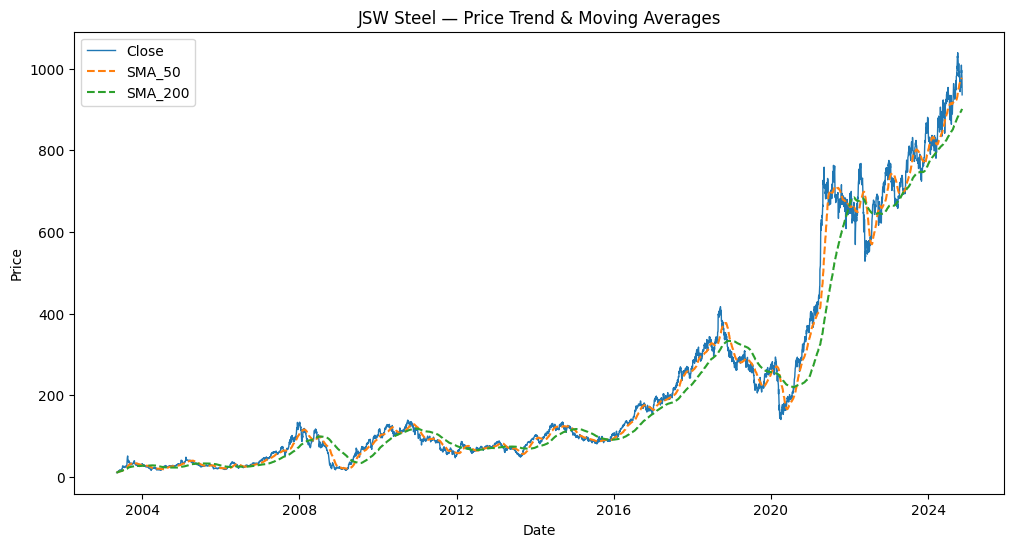

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pdf["Date"], pdf["Close"], label="Close", linewidth=1)
plt.plot(pdf["Date"], pdf["SMA_50"], label="SMA_50", linestyle="--")
plt.plot(pdf["Date"], pdf["SMA_200"], label="SMA_200", linestyle="--")
plt.legend()
plt.title("JSW Steel — Price Trend & Moving Averages")
plt.xlabel("Date"); plt.ylabel("Price")
plt.show()